## 21.6 Project
### Basin Hopping



### Introduction


Basin Hopping is a form of optimization used to find the global minimum of a function. Basin Hopping transforms the potential energy surface into a series of interpenetrating staircases. This allows for the exploitation of features needed in an energy landscape to obtain the global minimum. The method associates any point in the configured space with the local minimum obtained through the optimization process. It is important to note, however, that this method does not change the global minimum. This method has been used effectively for clusters up to 110 atoms.

In the following code three primary arguments are used in order to properly calculate the minimum. Basin Hopping utilizes the Lennard-Jones method to test a system's global minimum. The Lennard-Jones function is represented as:

$$ V = 4\epsilon \big[ \big(\frac{\delta}{r}\big)^{12} - \big(\frac{\delta}{r}\big)^{6} \big]$$

This is represented in python code as the following:

```python
import numpy as np
import matplotlib.pyplot as plt

def LJ(r):
    r6 = r**6
    r12 = r6*r6
    return 4*(1/r12 - 1/r6)

def total_energy(positions):
    """
    Calculate the total energy
    input:
    positions: 3*N array which represents the atomic positions
    output
    E: the total energy
    """
    E = 0
    N_atom = int(len(positions)/3)

    #positions = [x0, y0, z0, x1, y1, z1, .....  , xn, yn, zn]
    for i in range(N_atom-1):
        for j in range(i+1, N_atom):
            pos1 = positions[i*3:(i+1)*3]
            pos2 = positions[j*3:(j+1)*3]
            dist = np.linalg.norm(pos1-pos2)
            E += LJ(dist)
    return E
            
def init_pos(N, L=5):
    return L*np.random.random_sample((N*3,))
```

### Basin Hopping Code

Basin Hopping is already available in the form of a callable function within the scipy package. It can be called using the following code:

```python
from scipy.optimize import basinhopping

N_atom = 12
pos = init_pos(N_atom)
res = basinhopping(total_energy, pos, niter=50, T=2.0, stepsize=3.0, disp=True)
```

### Basin Hopping Arguments

Specific to the Basin Hopping method, three arguments are used in order to provide an accurate minimum. These arguments are described below:

niter = This stands for the number of iterations the basin hopping technique will attempt in order to find a new minimum.

T = This represents temperature. It allows for jumps between the function in order to "clear" high peaks. A higher number represents a higher vertical start.

stepsize = The stepsize represents the x-distance travelled between each iteration. A lower number will take longer to progress through the function, but will provide a more accurate value. A higher value runs the risk of skipping over a minimum.


### Start of Code

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def LJ(r):
    r6 = r**6
    r12 = r6*r6
    return 4*(1/r12 - 1/r6)

def total_energy(positions):
    """
    Calculate the total energy
    input:
    positions: 3*N array which represents the atomic positions
    output
    E: the total energy
    """
    E = 0
    N_atom = int(len(positions)/3)

    #positions = [x0, y0, z0, x1, y1, z1, .....  , xn, yn, zn]
    for i in range(N_atom-1):
        for j in range(i+1, N_atom):
            pos1 = positions[i*3:(i+1)*3]
            pos2 = positions[j*3:(j+1)*3]
            dist = np.linalg.norm(pos1-pos2)
            E += LJ(dist)
    return E
            
def init_pos(N, L=5):
    return L*np.random.random_sample((N*3,))

### First Iteration, FIndings, & Graph

I first apply the basin hopping technique to attempt to find the global minimum for 13 atoms. The iterations was set to 20 as this number appeared to give an appropriate amount of iterations to find the global minimum. The stepsize was set to 2.7 and the temperature was set to 1.5.

It became immediately clear that using the provided basin hopping technique provides no reasonable way to extract the local minimum of each iteration. This required me to create two separate lists with the x variable represented as the stepsize and the y variable represented by the local minimum of each iteration. This provides a graph that accurately represents the data outputted by the basin hopping technique. However, due to the time consuming nature of this method, it is best to find a combination of stepsize and temperature that can find the global minimum in as few iterations as possible.

According to global minimum values provided by Wales & Doye (1997), the global minimum for 13 atoms is -44.326801. Using the basin hopping method i was able to reach this minimum by my 19th iteration.

In [8]:
from scipy.optimize import basinhopping

N_atom = 13
pos = init_pos(N_atom)
res = basinhopping(total_energy, pos, niter=20, T=1.5, stepsize=2.7, disp=True)


basinhopping step 0: f -37.8563
basinhopping step 1: f -40.6155 trial_f -40.6155 accepted 1  lowest_f -40.6155
found new global minimum on step 1 with function value -40.6155
basinhopping step 2: f -40.6155 trial_f -38.7377 accepted 0  lowest_f -40.6155
basinhopping step 3: f -40.6155 trial_f -39.2522 accepted 0  lowest_f -40.6155
basinhopping step 4: f -41.3944 trial_f -41.3944 accepted 1  lowest_f -41.3944
found new global minimum on step 4 with function value -41.3944
basinhopping step 5: f -41.3944 trial_f -38.1832 accepted 0  lowest_f -41.3944
basinhopping step 6: f -41.3944 trial_f -37.6254 accepted 0  lowest_f -41.3944
basinhopping step 7: f -41.3944 trial_f -29.9253 accepted 0  lowest_f -41.3944
basinhopping step 8: f -41.472 trial_f -41.472 accepted 1  lowest_f -41.472
found new global minimum on step 8 with function value -41.472
basinhopping step 9: f -41.472 trial_f -38.5614 accepted 0  lowest_f -41.472
basinhopping step 10: f -41.472 trial_f -36.4503 accepted 0  lowest_f -

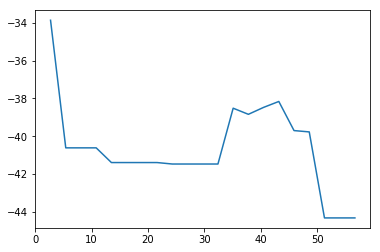

In [1]:
import matplotlib.pyplot as plt

energy1 = [-33.8563, -40.6155, -40.6155, -40.6155, -41.3944, -41.3944, -41.3944, -41.3944, -41.472, -41.472, -41.472, -41.472, -38.5153,
          -38.8392, -38.472, -38.1585, -39.7008, -39.7711, -44.3268, -44.3268, -44.3268]
step1 = [2.7, 5.4, 8.1, 10.8, 13.5, 16.2, 18.9, 21.6, 24.3, 27, 29.7, 32.4, 35.1, 37.8, 40.5, 43.2, 45.9, 48.6, 51.3, 54, 56.7]

plt.plot(step1, energy1)
plt.show()

### Second Iteration, Findings, & Graph

The second iteration was used to find the global minimum of 14 atoms. The number of iterations remained at 20, the temperature at 1.5, and a stepsize of 2.7. The data provided by Wales & Doyle (1997) indicates 14 atoms to have a global minimum value of -47.845157. This basin hopping method was able to find the global minimum by the 12th iteration of the function. 

In [20]:
from scipy.optimize import basinhopping

N_atom = 14
pos = init_pos(N_atom)
res = basinhopping(total_energy, pos, niter=20, T=1.5, stepsize=2.7, disp=True)

basinhopping step 0: f -43.0869
basinhopping step 1: f -43.0869 trial_f -34.2675 accepted 0  lowest_f -43.0869
basinhopping step 2: f -43.9294 trial_f -43.9294 accepted 1  lowest_f -43.9294
found new global minimum on step 2 with function value -43.9294
basinhopping step 3: f -43.9294 trial_f -39.3422 accepted 0  lowest_f -43.9294
basinhopping step 4: f -44.8938 trial_f -44.8938 accepted 1  lowest_f -44.8938
found new global minimum on step 4 with function value -44.8938
basinhopping step 5: f -44.8938 trial_f -38.6423 accepted 0  lowest_f -44.8938
basinhopping step 6: f -44.0819 trial_f -44.0819 accepted 1  lowest_f -44.8938
basinhopping step 7: f -44.0819 trial_f -34.4597 accepted 0  lowest_f -44.8938
basinhopping step 8: f -44.2062 trial_f -44.2062 accepted 1  lowest_f -44.8938
basinhopping step 9: f -44.2062 trial_f -40.9641 accepted 0  lowest_f -44.8938
basinhopping step 10: f -44.2062 trial_f -33.8148 accepted 0  lowest_f -44.8938
basinhopping step 11: f -44.1317 trial_f -44.1317

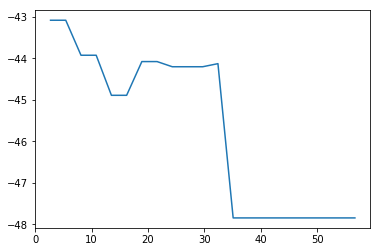

In [2]:
import matplotlib.pyplot as plt

energy2 = [-43.0869, -43.0869, -43.9294, -43.9294, -44.8938, -44.8938, -44.0819, -44.0819, -44.2062, -44.2062, -44.2062,
         -44.1317, -47.8452, -47.8452, -47.8452, -47.8452, -47.8452, -47.8452, -47.8452, -47.8452, -47.8452,]
step2 = [2.7, 5.4, 8.1, 10.8, 13.5, 16.2, 18.9, 21.6, 24.3, 27, 29.7, 32.4, 35.1, 37.8, 40.5, 43.2, 45.9, 48.6, 51.3, 54, 56.7]

plt.plot(step2, energy2)
plt.show()

### Third Iteration, Findings, & Graph

The third and final iteration attempted to find the global minimum for 15 atoms. The data by Wales & Doyle (1997) indicates a global minimum value of -52.322627 for 15 atoms. Noticeable in this attempt was a change of the Temperature from 1.5 to 2, and stepsize from 2.7 to 3.5. Utilizing the previous arguments failed to provide the global minimum within 20 iterations. With these new argument values the global minimum was found relatively quickly by the third iteration. However, the basin hopping technique did not remain at this minimum value for long before changing values and eventually returning to the global minimum on the final iteration.

In [3]:
from scipy.optimize import basinhopping

N_atom = 15
pos = init_pos(N_atom)
res = basinhopping(total_energy, pos, niter=20, T=2.0, stepsize=3.5, disp=True)

basinhopping step 0: f -47.1977
basinhopping step 1: f -46.4891 trial_f -46.4891 accepted 1  lowest_f -47.1977
basinhopping step 2: f -46.3445 trial_f -46.3445 accepted 1  lowest_f -47.1977
basinhopping step 3: f -52.3226 trial_f -52.3226 accepted 1  lowest_f -52.3226
found new global minimum on step 3 with function value -52.3226
basinhopping step 4: f -52.3226 trial_f -49.2285 accepted 0  lowest_f -52.3226
basinhopping step 5: f -52.3226 trial_f -47.9318 accepted 0  lowest_f -52.3226
basinhopping step 6: f -52.3226 trial_f -47.7051 accepted 0  lowest_f -52.3226
basinhopping step 7: f -52.3226 trial_f -49.2285 accepted 0  lowest_f -52.3226
basinhopping step 8: f -52.3226 trial_f -45.6629 accepted 0  lowest_f -52.3226
basinhopping step 9: f -49.2285 trial_f -49.2285 accepted 1  lowest_f -52.3226
basinhopping step 10: f -48.5016 trial_f -48.5016 accepted 1  lowest_f -52.3226
basinhopping step 11: f -48.5211 trial_f -48.5211 accepted 1  lowest_f -52.3226
basinhopping step 12: f -48.8885 

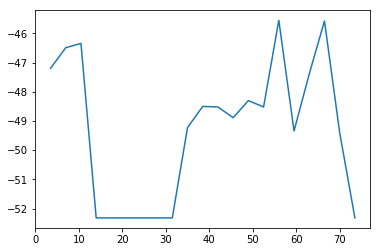

In [4]:
import matplotlib.pyplot as plt

energy3 = [-47.1977, -46.4891, -46.3445, -52.3226, -52.3226, -52.3226, -52.3226, -52.3226, -52.3226, -49.2285, -48.5016, -48.5211,
          -48.8885, -48.302, -48.5211, -45.5492, -49.3436, -47.39, -45.5748, -49.4037, -52.3226]
step3 = [3.5, 7.0, 10.5, 14.0, 17.5, 21.0, 24.5, 28.0, 31.5, 35.0, 38.5, 42.0, 45.5, 49.0, 52.5, 56.0, 59.5, 63.0, 66.5, 70.0,
         73.5]

plt.plot(step3, energy3)
plt.show()

### Conclusion

The most notable factor utilizing this basin hopping method was time. Due to the inability of this technique to provide the global minimum output values as a list or array, I had to manually create lists with these values. Additionally, the code itself took approximately two to three minutes to complete 20 iterations. This was another motivator to keep my iteration size relatively small. With a more refined code or faster processor, this method may be worthwhile for iterations larger than 20.

Despite these setbacks, which may very well be both user & hardware error, the basin hopping method was still able to reach the defined global minimums provided by Wales & Doye (1997). If nothing more this basin hopping method further proves these pre-defined global minimum values.

### References

Wales, D. J., & Doye, J. P. (1997). Global Optimization by Basin-Hopping and the Lowest Energy Structures of Lennard-Jones Clusters Containing up to 110 Atoms. The Journal of Physical Chemistry A, 101(28), 5111-5116. doi:10.1021/jp970984n